In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
print(cancer.data.shape), print(cancer.target.shape)

(569, 30)
(569,)


(None, None)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

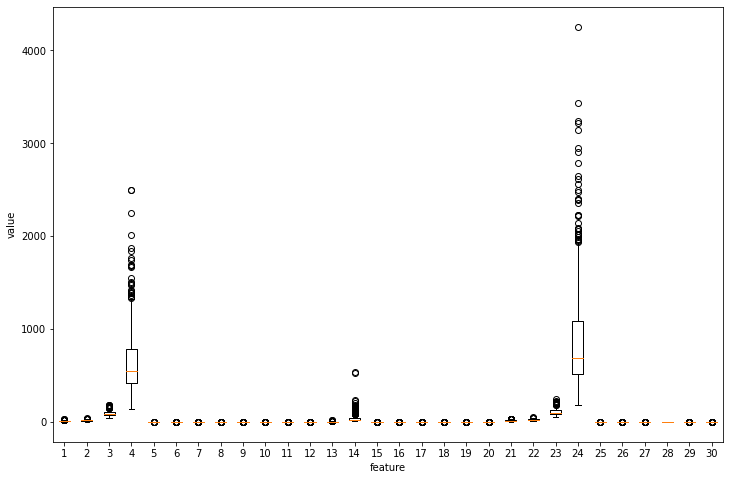

In [9]:
plt.figure(figsize=(12,8))
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [10]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [11]:
import numpy as np
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [12]:
x, y = cancer.data, cancer.target

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [18]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [25]:
class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                
                self.w -= w_grad
                self.b -= b_grad
                
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5

In [26]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp


In [28]:
np.mean(neuron.predict(x_test) == y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [33]:
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        
        for i in range(epochs):
            loss = 0
            idxs = np.random.permutation(np.arange(len(x)))
            
            for i in idxs:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                
                self.w -= w_grad
                self.b -= b_grad
                
                a = np.clip(a, 1e-10, 1-1e-10)
                
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
            
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]        
        return np.array(z) > 0
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [34]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


0.8333333333333334

Text(0, 0.5, 'loss')

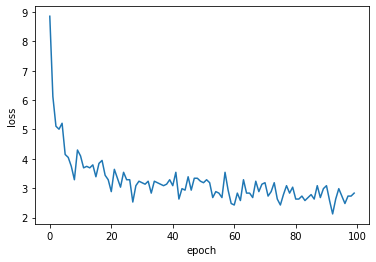

In [35]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [39]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334